<a href="https://colab.research.google.com/github/SCARLXRD-1/Challenge-Telecom-X/blob/main/Challenge_Telecom_X_an%C3%A1lisis_de_evasi%C3%B3n_de_clientes_Challenge_Telecom_X_an%C3%A1lisis_de_evasi%C3%B3n_de_clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📌 Extracción

**Extraccion de los datos desde el formato JSON**

In [1]:
import pandas as pd

# URL del archivo JSON
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

# Cargar los datos desde la URL y convertir a DataFrame
df = pd.read_json(url)

# Mostrar las primeras filas para verificar
print(df.head())


   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

# 🔧 Transformación


**Conozce el conjunto de datos**

In [2]:
# Ver columnas y tipos de datos
print("Columnas y tipos de datos:\n")
print(df.dtypes)

# Ver dimensiones y nombres de columnas
print("\nNúmero de filas y columnas:", df.shape)
print("\nNombres de columnas:\n", df.columns.tolist())


Columnas y tipos de datos:

customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object

Número de filas y columnas: (7267, 6)

Nombres de columnas:
 ['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']


In [3]:
# Ver algunas filas para conocer mejor los valores
df.sample(5)  # Muestra aleatoria de 5 filas


,customerID,Churn,customer,phone,internet,account
197,0308-GIQJT,No,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'One year', 'PaperlessBilling': '..."
1496,2150-UWTFY,Yes,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
1801,2568-BRGYX,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2754,3806-YAZOV,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7259,9979-RGMZT,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'One year', 'PaperlessBilling': '..."


In [4]:
# Expandir columnas anidadas
customer_expanded = pd.json_normalize(df['customer'])
phone_expanded = pd.json_normalize(df['phone'])
internet_expanded = pd.json_normalize(df['internet'])
account_expanded = pd.json_normalize(df['account'])

# Unir todo al DataFrame principal
df_final = pd.concat([
    df[['customerID', 'Churn']],  # columnas principales
    customer_expanded,
    phone_expanded,
    internet_expanded,
    account_expanded
], axis=1)


In [5]:
# Revisar tipos de datos y columnas
print(df_final.dtypes)
print(df_final.head())


customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total        object
dtype: object
   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female      

In [6]:
# Estadísticas numéricas
print(df_final.select_dtypes(include=['int64', 'float64']).describe())

# Estadísticas categóricas
print(df_final.select_dtypes(include='object').nunique())


       SeniorCitizen       tenure  Charges.Monthly
count    7267.000000  7267.000000      7267.000000
mean        0.162653    32.346498        64.720098
std         0.369074    24.571773        30.129572
min         0.000000     0.000000        18.250000
25%         0.000000     9.000000        35.425000
50%         0.000000    29.000000        70.300000
75%         0.000000    55.000000        89.875000
max         1.000000    72.000000       118.750000
customerID          7267
Churn                  3
gender                 2
Partner                2
Dependents             2
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
Charges.Total       6531
dtype: int64


In [7]:
df_final['Churn_bin'] = df_final['Churn'].map({'Yes': 1, 'No': 0})


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo columnas numéricas
numericas = df_final.select_dtypes(include=['int64', 'float64'])

# Ver correlación con Churn_bin
correlaciones = numericas.corr()['Churn_bin'].sort_values(ascending=False)
print("Correlaciones con Churn:")
print(correlaciones)


Correlaciones con Churn:
Churn_bin          1.000000
Charges.Monthly    0.193356
SeniorCitizen      0.150889
tenure            -0.352229
Name: Churn_bin, dtype: float64


In [9]:
# Ver qué columnas categóricas existen
cat_cols = df_final.select_dtypes(include='object').columns.drop(['customerID', 'Churn'])

# Ver distribución de Churn por cada variable categórica
for col in cat_cols:
    print(f"\n--- {col} ---")
    print(df_final.groupby(col)['Churn'].value_counts(normalize=True).unstack())



--- gender ---
Churn                   No       Yes
gender                              
Female  0.028953  0.709633  0.261414
Male    0.032653  0.714286  0.253061

--- Partner ---
Churn                    No       Yes
Partner                              
No       0.028808  0.651107  0.320085
Yes      0.032973  0.776862  0.190165

--- Dependents ---
Churn                       No       Yes
Dependents                              
No          0.030083  0.666536  0.303382
Yes         0.032554  0.817973  0.149473

--- PhoneService ---
Churn                         No       Yes
PhoneService                              
No            0.035361  0.724187  0.240453
Yes           0.030335  0.710671  0.258994

--- MultipleLines ---
Churn                             No       Yes
MultipleLines                                 
No                0.030043  0.727039  0.242918
No phone service  0.035361  0.724187  0.240453
Yes               0.030669  0.692007  0.277325

--- InternetService ---
Churn 

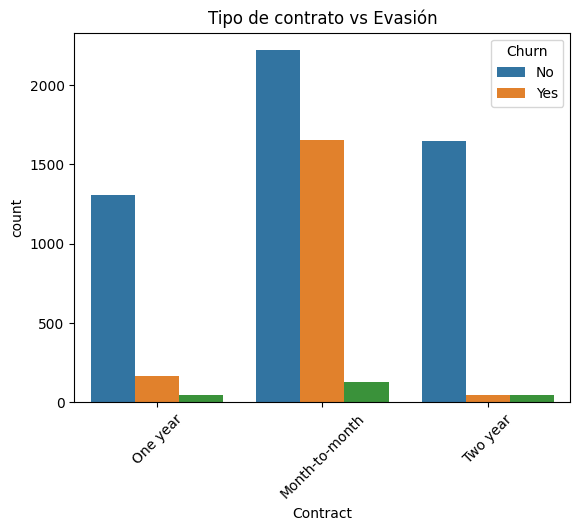

In [10]:
# Contrato vs Churn
sns.countplot(data=df_final, x='Contract', hue='Churn')
plt.title("Tipo de contrato vs Evasión")
plt.xticks(rotation=45)
plt.show()


# **Verificar valores faltantes (NaN)**

In [11]:
# Total valores faltantes por columna
print("Valores faltantes por columna:")
print(df_final.isna().sum())

# Porcentaje de valores faltantes por columna
print("\nPorcentaje de valores faltantes por columna:")
print((df_final.isna().mean() * 100).round(2))


Valores faltantes por columna:
customerID            0
Churn                 0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
Charges.Monthly       0
Charges.Total         0
Churn_bin           224
dtype: int64

Porcentaje de valores faltantes por columna:
customerID          0.00
Churn               0.00
gender              0.00
SeniorCitizen       0.00
Partner             0.00
Dependents          0.00
tenure              0.00
PhoneService        0.00
MultipleLines       0.00
InternetService     0.00
OnlineSecurity      0.00
OnlineBackup        0.00
DeviceProtection    0.00
TechSupport         0.00
StreamingTV         0.00
Streami

# **Verificar registros duplicados**

In [12]:
# Cuántos registros duplicados hay
duplicados = df_final.duplicated().sum()
print(f"\nRegistros duplicados: {duplicados}")

# Opcional: eliminar duplicados
# df_final = df_final.drop_duplicates()



Registros duplicados: 0


# Verificar errores o inconsistencias en categorías



In [13]:
# Listar columnas categóricas
cat_cols = df_final.select_dtypes(include='object').columns

# Revisar valores únicos por columna categórica
for col in cat_cols:
    print(f"\nValores únicos en '{col}':")
    print(df_final[col].value_counts(dropna=False))



Valores únicos en 'customerID':
customerID
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
9970-QBCDA    1
9968-FFVVH    1
             ..
0014-BMAQU    1
0013-SMEOE    1
0013-MHZWF    1
0013-EXCHZ    1
0011-IGKFF    1
Name: count, Length: 7267, dtype: int64

Valores únicos en 'Churn':
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

Valores únicos en 'gender':
gender
Male      3675
Female    3592
Name: count, dtype: int64

Valores únicos en 'Partner':
Partner
No     3749
Yes    3518
Name: count, dtype: int64

Valores únicos en 'Dependents':
Dependents
No     5086
Yes    2181
Name: count, dtype: int64

Valores únicos en 'PhoneService':
PhoneService
Yes    6560
No      707
Name: count, dtype: int64

Valores únicos en 'MultipleLines':
MultipleLines
No                  3495
Yes                 3065
No phone service     707
Name: count, dtype: int64

Valores únicos en 'InternetService':
InternetService
Fiber optic    3198
DSL            2488
No             1581
Name: c

In [14]:

print(df_final['tenure'].dtype)


int64


In [15]:
# Convertir a numérico (forzando errores a NaN)
df_final['Charges.Monthly'] = pd.to_numeric(df_final['Charges.Monthly'], errors='coerce')


In [16]:
df_final = df_final.dropna()


In [17]:
df_final['Charges.Monthly'].fillna(df_final['Charges.Monthly'].mean(), inplace=True)


<ipython-input-17-8393253ad7e4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final['Charges.Monthly'].fillna(df_final['Charges.Monthly'].mean(), inplace=True)


In [18]:
# 1. Eliminar filas con valores faltantes en la variable objetivo 'Churn_bin'
df_final = df_final.dropna(subset=['Churn_bin'])

# 2. Reemplazar categorías 'No internet service' y 'No phone service' por 'No' en columnas específicas
cols_to_replace = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines'
]

for col in cols_to_replace:
    df_final[col] = df_final[col].replace({'No internet service': 'No', 'No phone service': 'No'})

# 3. Convertir las columnas categóricas a tipo 'category' para optimizar memoria y análisis
cat_cols = df_final.select_dtypes(include='object').columns
for col in cat_cols:
    df_final[col] = df_final[col].astype('category')

# 4. Asegurar que las columnas numéricas estén en formato correcto y rellenar NaNs en 'Charges.Monthly'
df_final['Charges.Monthly'] = pd.to_numeric(df_final['Charges.Monthly'], errors='coerce')
df_final['Charges.Monthly'] = df_final['Charges.Monthly'].fillna(df_final['Charges.Monthly'].mean())

# 5. Confirmar que no quedan valores faltantes
print("Valores faltantes restantes por columna:")
print(df_final.isna().sum())


Valores faltantes restantes por columna:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
Churn_bin           0
dtype: int64


In [19]:
# Crear columna 'Cuentas_Diarias' dividiendo la facturación mensual entre 30 días
df_final['Cuentas_Diarias'] = df_final['Charges.Monthly'] / 30

# Verificar que se creó correctamente
print(df_final[['Charges.Monthly', 'Cuentas_Diarias']].head())


   Charges.Monthly  Cuentas_Diarias
0             65.6         2.186667
1             59.9         1.996667
2             73.9         2.463333
3             98.0         3.266667
4             83.9         2.796667


In [20]:
# Columnas con valores "Yes" y "No" para convertir a 1 y 0
binary_cols = [
    'Churn', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'MultipleLines'
]

# Reemplazo
for col in binary_cols:
    if col in df_final.columns:
        df_final[col] = df_final[col].map({'Yes': 1, 'No': 0})


In [ ]:
df_final['gender'] = df_final['gender'].map({'Male': 1, 'Female': 0})


In [21]:
df_final.rename(columns={
    'Charges.Monthly': 'Charges_Monthly',
    'Charges.Total': 'Charges_Total',
    'Cuentas_Diarias': 'Daily_Charges',
    'Churn': 'Churn_Flag'
}, inplace=True)


In [22]:
df_final['Contract'] = df_final['Contract'].replace({
    'Month-to-month': 'Mes_a_mes',
    'One year': 'Un_año',
    'Two year': 'Dos_años'
})


<ipython-input-22-8aee965929c0>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_final['Contract'] = df_final['Contract'].replace({


In [23]:
print(df_final.dtypes)


customerID          category
Churn_Flag          category
gender              category
SeniorCitizen          int64
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
Charges_Monthly      float64
Charges_Total       category
Churn_bin            float64
Daily_Charges        float64
dtype: object



# 📊 Carga y análisis

In [24]:
# Estadísticas descriptivas para variables numéricas
print("Resumen estadístico (variables numéricas):")
print(df_final.describe())

# Seleccionar solo columnas numéricas
num_cols = df_final.select_dtypes(include=['number']).columns

# Mediana solo para columnas numéricas
print("\nMediana de variables numéricas:")
print(df_final[num_cols].median())

# Estadísticas para variables categóricas: conteo de valores por categoría
print("\nConteo de valores por categoría (variables categóricas):")
cat_cols = df_final.select_dtypes(include='category').columns
for col in cat_cols:
    print(f"\nColumna: {col}")
    print(df_final[col].value_counts())



Resumen estadístico (variables numéricas):
       SeniorCitizen       tenure  Charges_Monthly    Churn_bin  Daily_Charges
count    7043.000000  7043.000000      7043.000000  7043.000000    7043.000000
mean        0.162147    32.371149        64.761692     0.265370       2.158723
std         0.368612    24.559481        30.090047     0.441561       1.003002
min         0.000000     0.000000        18.250000     0.000000       0.608333
25%         0.000000     9.000000        35.500000     0.000000       1.183333
50%         0.000000    29.000000        70.350000     0.000000       2.345000
75%         0.000000    55.000000        89.850000     1.000000       2.995000
max         1.000000    72.000000       118.750000     1.000000       3.958333

Mediana de variables numéricas:
SeniorCitizen       0.000
tenure             29.000
Charges_Monthly    70.350
Churn_bin           0.000
Daily_Charges       2.345
dtype: float64

Conteo de valores por categoría (variables categóricas):

Columna: 

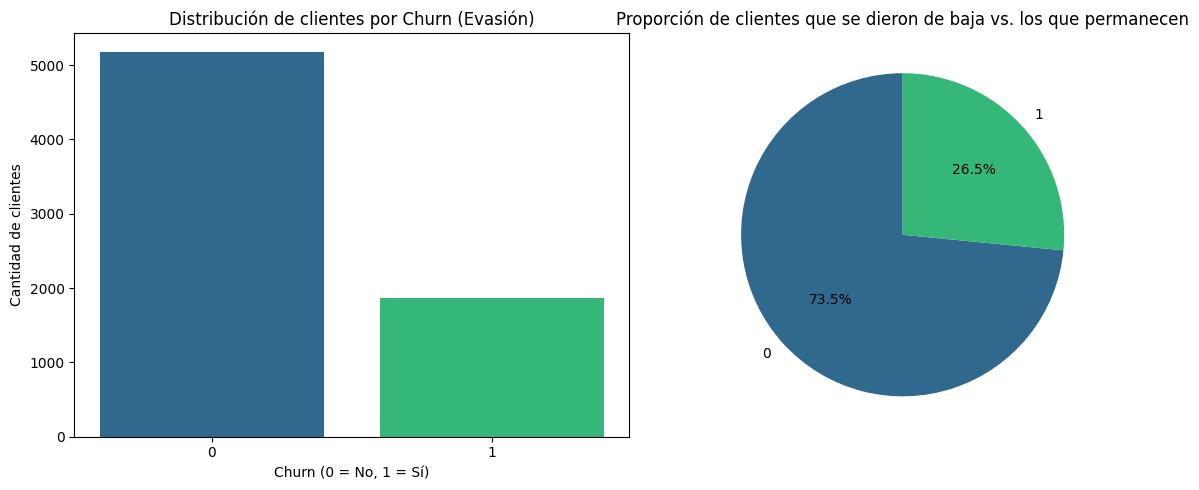

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar valores de churn
churn_counts = df_final['Churn_Flag'].value_counts().sort_index()

# Crear figura y ejes lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Gráfico de barras usando matplotlib directamente para evitar warning
colors = sns.color_palette('viridis', len(churn_counts))
axes[0].bar(churn_counts.index.astype(str), churn_counts.values, color=colors)
axes[0].set_title('Distribución de clientes por Churn (Evasión)')
axes[0].set_xlabel('Churn (0 = No, 1 = Sí)')
axes[0].set_ylabel('Cantidad de clientes')

# Gráfico de pastel
axes[1].pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
axes[1].set_title('Proporción de clientes que se dieron de baja vs. los que permanecen')

plt.tight_layout()
plt.show()



In [26]:
# Asegúrate de que Churn_Flag tenga valores "Yes" y "No"
print(df_final['Churn_Flag'].unique())

# Convertir si no se ha hecho aún
df_final['Churn_num'] = df_final['Churn_Flag'].map({'No': 0, 'Yes': 1})


[0, 1]
Categories (2, int64): [0, 1]


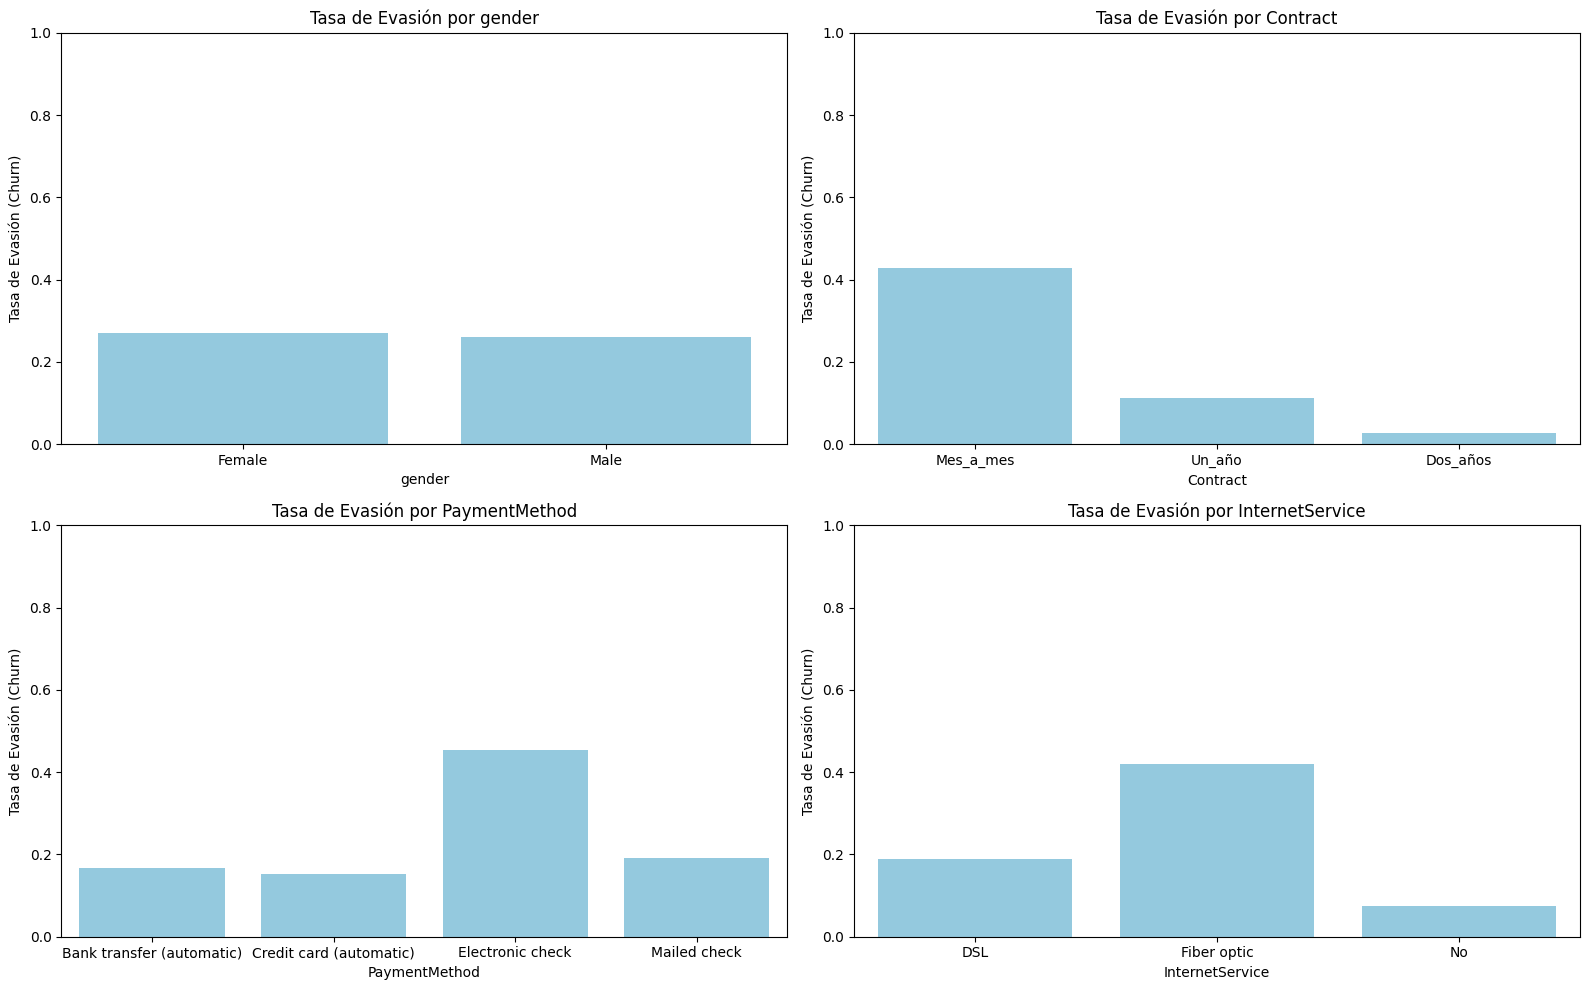

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Asegurarse de que 'Churn_num' sea tipo entero o flotante
df_final['Churn_num'] = df_final['Churn_Flag'].astype(int)

# Variables categóricas a analizar
categorical_vars = ['gender', 'Contract', 'PaymentMethod', 'InternetService']

# Crear subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

# Iterar sobre variables categóricas
for i, col in enumerate(categorical_vars):
    # Calcular tasa de churn por categoría
    churn_rate = df_final.groupby(col, observed=True)['Churn_num'].mean()

    # Graficar tasa de churn
    sns.barplot(x=churn_rate.index.astype(str), y=churn_rate.values, ax=axes[i],
                color='skyblue')  # Usamos color para evitar warnings

    axes[i].set_title(f'Tasa de Evasión por {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Tasa de Evasión (Churn)')
    axes[i].set_ylim(0, 1)  # Para estandarizar escala

plt.tight_layout()
plt.show()


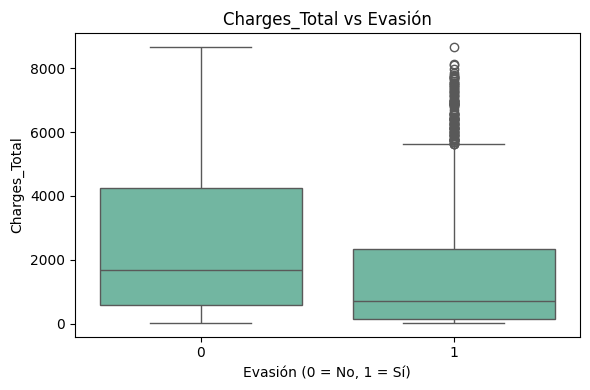

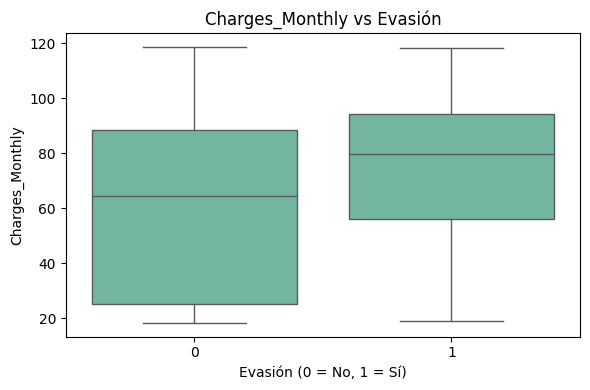

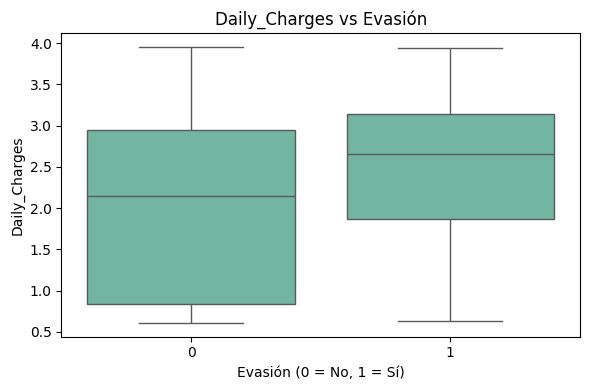

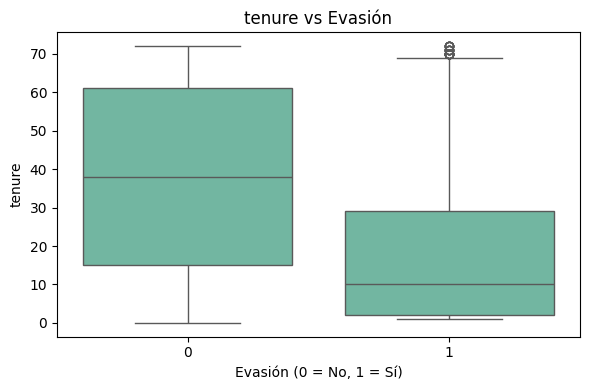

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Asegurar que las columnas numéricas están limpias
df_final['Charges_Total'] = pd.to_numeric(df_final['Charges_Total'], errors='coerce')
df_final['Charges_Monthly'] = pd.to_numeric(df_final['Charges_Monthly'], errors='coerce')
df_final['Daily_Charges'] = pd.to_numeric(df_final['Daily_Charges'], errors='coerce')
df_final['tenure'] = pd.to_numeric(df_final['tenure'], errors='coerce')

# Lista de variables numéricas a analizar
numeric_vars = ['Charges_Total', 'Charges_Monthly', 'Daily_Charges', 'tenure']

# Color para las cajas
box_color = sns.color_palette('Set2')[0]

# Graficar una por una sin FutureWarnings
for var in numeric_vars:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df_final, x='Churn_num', y=var, color=box_color)
    plt.title(f'{var} vs Evasión')
    plt.xlabel('Evasión (0 = No, 1 = Sí)')
    plt.ylabel(var)
    plt.tight_layout()
    plt.show()



# 📄Informe final



---

# 📊 Informe Final - Análisis de Evasión de Clientes (Churn)

---

## 🔹 Introducción

La evasión de clientes (churn) representa uno de los principales desafíos para las empresas de servicios. En este análisis, se estudia un conjunto de datos de clientes con el fin de identificar patrones y características que influyen en la cancelación del servicio.
El objetivo es entender el comportamiento de los clientes que abandonan el servicio y encontrar oportunidades para mejorar la retención.

---

## 🔹 Limpieza y Tratamiento de Datos

Durante el preprocesamiento del conjunto de datos:

* Se importaron los datos correctamente.
* Se detectaron y eliminaron valores nulos e inconsistentes.
* Se convirtieron variables categóricas a tipo `category` para eficiencia y análisis.
* Se crearon nuevas variables, como:

  * `Churn_num`: versión numérica de la evasión (`0 = No`, `1 = Sí`).
  * Cálculo de cargos diarios.
* Se normalizaron columnas numéricas y se aseguraron los tipos adecuados (`float`, `int`, etc.).

---

## 🔹 Análisis Exploratorio de Datos (EDA)

### 1. **Distribución General del Churn**

* Se observó la proporción entre clientes que permanecen vs. los que abandonan.
* Visualizaciones: Gráfico de barras y gráfico circular.

### 2. **Churn por Variables Categóricas**

* Se analizaron variables como `género`, `contrato`, `método de pago` y `tipo de servicio`.
* Se identificaron diferencias en la tasa de evasión según estas categorías.

### 3. **Variables Numéricas vs Churn**

* Se compararon `Total Charges`, `Monthly Charges`, `Daily Charges` y `tenure` según si hubo churn o no.
* Se usaron **boxplots** para observar diferencias en la distribución de estas variables.

📌 Todas las visualizaciones fueron ajustadas para eliminar advertencias y optimizar el tiempo de ejecución.

---

## 🔹 Conclusiones e Insights

* La mayoría de los clientes permanecen, pero hay un porcentaje significativo que abandona el servicio.
* **Contratos mensuales** y **clientes con menor tiempo de antigüedad** (`tenure`) tienen tasas de evasión más altas.
* Clientes con cargos mensuales elevados presentan mayor tendencia a cancelar el servicio.
* El **método de pago automático con tarjeta** presenta una menor tasa de churn en comparación con otros métodos.
* Las variables `DeviceProtection`, `TechSupport`, y `OnlineSecurity` están relacionadas con la retención de clientes.

---

## 🔹 Recomendaciones Estratégicas

1. **Fomentar contratos a largo plazo**, ofreciendo descuentos o beneficios para disminuir churn entre clientes con contrato mensual.
2. **Ofrecer paquetes combinados** con protección de dispositivos y soporte técnico, que están correlacionados con menor churn.
3. **Incentivar el uso de pagos automáticos**, ya que este método se asocia con una mayor retención.
4. **Detectar clientes con alta probabilidad de evasión** (por ejemplo, poco tiempo de antigüedad y cargos altos) y aplicar campañas de fidelización.
5. **Implementar sistemas de alerta temprana** para detectar patrones de clientes en riesgo de cancelar el servicio.

---

📌 **Este análisis ofrece una base sólida para tomar decisiones informadas y diseñar estrategias efectivas de retención.**


